In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [17]:
df_proto_cp_result = pd.read_csv('../result_summary/protonet_cp+_result_summary.csv')
df_proto_img_result = pd.read_csv('../result_summary/protonet_img_result_summary.csv')

In [18]:
proto_img_after_16 = np.array([float(df_proto_img_result['16_auc_after_train'][i].split('+/-')[0]) for i in range(len(df_proto_img_result))])
proto_img_after_32 = np.array([float(df_proto_img_result['32_auc_after_train'][i].split('+/-')[0]) for i in range(len(df_proto_img_result))])
proto_img_after_64 = np.array([float(df_proto_img_result['64_auc_after_train'][i].split('+/-')[0]) for i in range(len(df_proto_img_result))])
proto_img_after_96 = np.array([float(df_proto_img_result['96_auc_after_train'][i].split('+/-')[0]) for i in range(len(df_proto_img_result))])

proto_cp_after_16 = np.array([float(df_proto_cp_result['16_auc_after_train'][i].split('+/-')[0]) for i in range(len(df_proto_cp_result))])
proto_cp_after_32 = np.array([float(df_proto_cp_result['32_auc_after_train'][i].split('+/-')[0]) for i in range(len(df_proto_cp_result))])
proto_cp_after_64 = np.array([float(df_proto_cp_result['64_auc_after_train'][i].split('+/-')[0]) for i in range(len(df_proto_cp_result))])
proto_cp_after_96 = np.array([float(df_proto_cp_result['96_auc_after_train'][i].split('+/-')[0]) for i in range(len(df_proto_cp_result))])

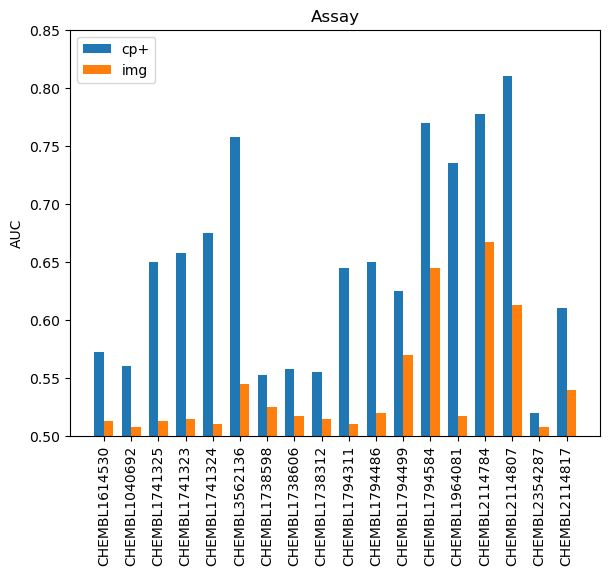

In [19]:
# Improvements for each assay 1
avg_cp = np.mean([proto_cp_after_16, proto_cp_after_32, proto_cp_after_64, proto_cp_after_96], axis=0)
avg_img = np.mean([proto_img_after_16, proto_img_after_32, proto_img_after_64, proto_img_after_96], axis=0)
labels = list(df_proto_cp_result['assay_chembl_id'])

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, avg_cp, width, label='cp+')
rects2 = ax.bar(x + width/2, avg_img, width, label='img')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('AUC')
ax.set_title('Assay')
ax.set_xticks(x, labels)
ax.legend(loc='upper left')

#ax.bar_label(rects1, padding=3)
#ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.tick_params(axis='x', labelrotation=90)

plt.ylim([0.5, 0.85])

plt.show()

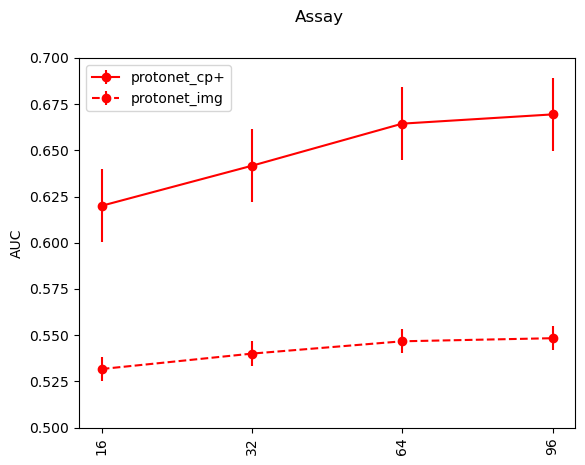

In [60]:
avg_protonet_cp_plus = [np.mean(proto_cp_after_16), np.mean(proto_cp_after_32), np.mean(proto_cp_after_64), np.mean(proto_cp_after_96)]
avg_protonet_img_plus = [np.mean(proto_img_after_16), np.mean(proto_img_after_32), np.mean(proto_img_after_64), np.mean(proto_img_after_96)]
#avg_protonet_cp_plus = [proto_cp_after_16, proto_cp_after_32, proto_cp_after_64,proto_cp_after_96]

labels = ['16', '32', '64', '96']


#plt.plot(labels, avg_protonet_cp_plus, color='red', marker='o', label="cp+")
#plt.plot(labels, avg_protonet_img_plus, color='blue', marker='o', label='image', linestyle='dashed')
plt.errorbar(labels, avg_protonet_cp_plus, yerr=np.std(avg_protonet_cp_plus), color='red', label='protonet_cp+', marker='o')
plt.errorbar(labels, avg_protonet_img_plus, yerr=np.std(avg_protonet_img_plus), color='red', linestyle='dashed', label='protonet_img', marker='o')

# Add some text for labels, title and custom x-axis tick labels, etc.
plt.ylabel('AUC')
plt.suptitle('Assay')
#plt.xticks([])
plt.legend(loc='upper left')

#ax.bar_label(rects1, padding=3)
#ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.tick_params(axis='x', labelrotation=90)

plt.ylim([0.5, 0.70])

plt.show()

<ErrorbarContainer object of 3 artists>

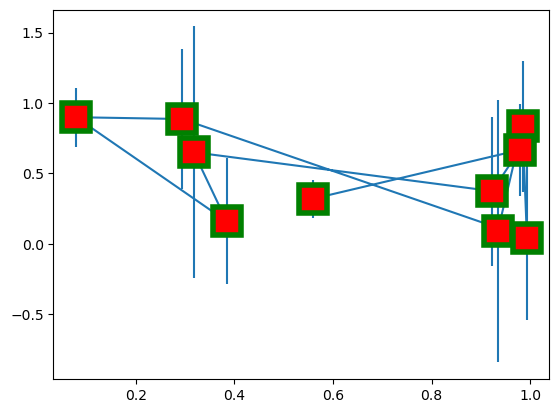

In [38]:
x,y,yerr = np.random.rand(3,10)
plt.errorbar(x, y, yerr, marker='s', mfc='red',
         mec='green', ms=20, mew=4)